# **Import the dataset**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ML-FinalProject/final_data_no_PCA.csv')
print(df.shape)
df.head()

(19735, 29)


,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,NSM,week_status,day_of_week
0,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,61200,1,0
1,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,61800,1,0
2,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,62400,1,0
3,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,63000,1,0
4,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,63600,1,0


In [ ]:
def make_lagged_features(df):

  # Number of lagged steps
  win_length = 3

  # Dynamically select columns to lag (exclude the ones you don't want)
  columns_to_lag = [col for col in df.columns]

  # Create lagged features
  df_lagged = pd.DataFrame()
  for col in columns_to_lag:
      for lag in range(1, win_length + 1):
          df_lagged[f'{col}_lag{lag}'] = df[col].shift(lag)

  # Drop the first 3 rows which will have NaN values due to the lag
  df_lagged = df_lagged.dropna()
  df_lagged['Appliances'] = df['Appliances']
  return df_lagged

In [ ]:
df_lagged = make_lagged_features(df)

In [ ]:
df_lagged.head()

,Appliances_lag1,Appliances_lag2,Appliances_lag3,lights_lag1,lights_lag2,lights_lag3,T1_lag1,T1_lag2,T1_lag3,RH_1_lag1,...,NSM_lag1,NSM_lag2,NSM_lag3,week_status_lag1,week_status_lag2,week_status_lag3,day_of_week_lag1,day_of_week_lag2,day_of_week_lag3,Appliances
3,50.0,60.0,60.0,30.0,30.0,30.0,19.89,19.89,19.89,46.300000,...,62400.0,61800.0,61200.0,1.0,1.0,1.0,0.0,0.0,0.0,50
4,50.0,50.0,60.0,40.0,30.0,30.0,19.89,19.89,19.89,46.066667,...,63000.0,62400.0,61800.0,1.0,1.0,1.0,0.0,0.0,0.0,60
5,60.0,50.0,50.0,40.0,40.0,30.0,19.89,19.89,19.89,46.333333,...,63600.0,63000.0,62400.0,1.0,1.0,1.0,0.0,0.0,0.0,50
6,50.0,60.0,50.0,40.0,40.0,40.0,19.89,19.89,19.89,46.026667,...,64200.0,63600.0,63000.0,1.0,1.0,1.0,0.0,0.0,0.0,60
7,60.0,50.0,60.0,50.0,40.0,40.0,19.89,19.89,19.89,45.766667,...,64800.0,64200.0,63600.0,1.0,1.0,1.0,0.0,0.0,0.0,60


In [ ]:
df_lagged.columns

Index(['Appliances_lag1', 'Appliances_lag2', 'Appliances_lag3', 'lights_lag1',
       'lights_lag2', 'lights_lag3', 'T1_lag1', 'T1_lag2', 'T1_lag3',
       'RH_1_lag1', 'RH_1_lag2', 'RH_1_lag3', 'T2_lag1', 'T2_lag2', 'T2_lag3',
       'RH_2_lag1', 'RH_2_lag2', 'RH_2_lag3', 'T3_lag1', 'T3_lag2', 'T3_lag3',
       'RH_3_lag1', 'RH_3_lag2', 'RH_3_lag3', 'T4_lag1', 'T4_lag2', 'T4_lag3',
       'RH_4_lag1', 'RH_4_lag2', 'RH_4_lag3', 'T5_lag1', 'T5_lag2', 'T5_lag3',
       'RH_5_lag1', 'RH_5_lag2', 'RH_5_lag3', 'T6_lag1', 'T6_lag2', 'T6_lag3',
       'RH_6_lag1', 'RH_6_lag2', 'RH_6_lag3', 'T7_lag1', 'T7_lag2', 'T7_lag3',
       'RH_7_lag1', 'RH_7_lag2', 'RH_7_lag3', 'T8_lag1', 'T8_lag2', 'T8_lag3',
       'RH_8_lag1', 'RH_8_lag2', 'RH_8_lag3', 'T9_lag1', 'T9_lag2', 'T9_lag3',
       'RH_9_lag1', 'RH_9_lag2', 'RH_9_lag3', 'T_out_lag1', 'T_out_lag2',
       'T_out_lag3', 'Press_mm_hg_lag1', 'Press_mm_hg_lag2',
       'Press_mm_hg_lag3', 'RH_out_lag1', 'RH_out_lag2', 'RH_out_lag3',
       'Wind

# **Help Functions**

In [ ]:
# Define the MAPE function
def mape(actual, pred):
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

def apply_GBM_model(df):

  # Features (X) and target (y)
  X = df.drop(columns=['Appliances'])
  y = df['Appliances']

  # Scale the data
  scaler_X = StandardScaler()
  scaler_y = StandardScaler()
  X = scaler_X.fit_transform(X)
  y = scaler_y.fit_transform(y.values.reshape(-1, 1))

  # Split data into train and test sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # Initialize the GBM model
  gbm_model = GradientBoostingRegressor(random_state=42, max_depth=5, n_estimators=1500)

  # Train the model
  gbm_model.fit(X_train, y_train)


  # Make predictions
  y_train_pred_gbm = gbm_model.predict(X_train)
  y_test_pred_gbm = gbm_model.predict(X_test)

  # Inverse transform predictions
  y_train_pred_gbm = scaler_y.inverse_transform(y_train_pred_gbm.reshape(-1, 1))
  y_test_pred_gbm = scaler_y.inverse_transform(y_test_pred_gbm.reshape(-1, 1))

  # Inverse transform actual values
  y_train = scaler_y.inverse_transform(y_train.reshape(-1, 1))
  y_test = scaler_y.inverse_transform(y_test.reshape(-1, 1))

  # Residuals
  residuals = y_train - y_train_pred_gbm

  # Plot residuals
  plt.figure(figsize=(8, 6))
  plt.scatter(y_train, residuals)
  plt.xlabel("Appliances Energy Consumption")
  plt.ylabel("Residuals")
  plt.axhline(0, color='red', linestyle='--')

  # RMSE for GBM
  rmse_train_gbm = np.sqrt(mean_squared_error(y_train, y_train_pred_gbm))
  rmse_test_gbm = np.sqrt(mean_squared_error(y_test, y_test_pred_gbm))
  print(f"GBM Model Training RMSE: {rmse_train_gbm}")
  print(f"GBM Model Testing RMSE: {rmse_test_gbm}\n")

  # MAPE for GBM
  mape_train_gbm = mape(y_train, y_train_pred_gbm)
  mape_test_gbm = mape(y_test, y_test_pred_gbm)
  print(f"GBM Model Training MAPE: {mape_train_gbm}%")
  print(f"GBM Model Testing MAPE: {mape_test_gbm}%\n")

  # MAE for GBM
  mae_train_gbm = mean_absolute_error(y_train, y_train_pred_gbm)
  mae_test_gbm = mean_absolute_error(y_test, y_test_pred_gbm)
  print(f"GBM Model Training MAE: {mae_train_gbm}")
  print(f"GBM Model Testing MAE: {mae_test_gbm}\n")

  # R-squared for GBM
  r2_train_gbm = r2_score(y_train, y_train_pred_gbm)
  r2_test_gbm = r2_score(y_test, y_test_pred_gbm)
  print(f"GBM Model Training R2: {r2_train_gbm}")
  print(f"GBM Model Testing R2: {r2_test_gbm}")

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import xgboost as xgb

def apply_XGBoost_model(df):

  # Features (X) and target (y)
  X = df.drop(columns=['Appliances'])
  y = df['Appliances']

  # Scale the data
  scaler_X = StandardScaler()
  scaler_y = StandardScaler()
  X = scaler_X.fit_transform(X)
  y = scaler_y.fit_transform(y.values.reshape(-1, 1))

  # Split data into train and test sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  xgb_model = xgb.XGBRegressor(
      random_state=42,
      max_depth=5,
      n_estimators=1500,
      learning_rate=0.1,
      tree_method='hist'
  )

  # Train the model
  xgb_model.fit(X_train, y_train)


  # Make predictions
  y_train_pred_gbm = xgb_model.predict(X_train)
  y_test_pred_gbm = xgb_model.predict(X_test)

  # Inverse transform predictions
  y_train_pred_gbm = scaler_y.inverse_transform(y_train_pred_gbm.reshape(-1, 1))
  y_test_pred_gbm = scaler_y.inverse_transform(y_test_pred_gbm.reshape(-1, 1))

  # Inverse transform actual values
  y_train = scaler_y.inverse_transform(y_train.reshape(-1, 1))
  y_test = scaler_y.inverse_transform(y_test.reshape(-1, 1))

  # Residuals
  residuals = y_train - y_train_pred_gbm

  # Plot residuals
  plt.figure(figsize=(8, 6))
  plt.scatter(y_train, residuals)
  plt.xlabel("Appliances Energy Consumption")
  plt.ylabel("Residuals")
  plt.axhline(0, color='red', linestyle='--')

  # RMSE for XGBoost
  rmse_train_gbm = np.sqrt(mean_squared_error(y_train, y_train_pred_gbm))
  rmse_test_gbm = np.sqrt(mean_squared_error(y_test, y_test_pred_gbm))
  print(f"XGBoost Model Training RMSE: {rmse_train_gbm}")
  print(f"XGBoost Model Testing RMSE: {rmse_test_gbm}\n")

  # MAPE for XGBoost
  mape_train_gbm = mape(y_train, y_train_pred_gbm)
  mape_test_gbm = mape(y_test, y_test_pred_gbm)
  print(f"XGBoost Model Training MAPE: {mape_train_gbm}%")
  print(f"XGBoost Model Testing MAPE: {mape_test_gbm}%\n")

  # MAE for XGBoost
  mae_train_gbm = mean_absolute_error(y_train, y_train_pred_gbm)
  mae_test_gbm = mean_absolute_error(y_test, y_test_pred_gbm)
  print(f"XGBoost Model Training MAE: {mae_train_gbm}")
  print(f"XGBoost Model Testing MAE: {mae_test_gbm}\n")

  # R-squared for XGBoost
  r2_train_gbm = r2_score(y_train, y_train_pred_gbm)
  r2_test_gbm = r2_score(y_test, y_test_pred_gbm)
  print(f"XGBoost Model Training R2: {r2_train_gbm}")
  print(f"XGBoost Model Testing R2: {r2_test_gbm}")

# **Apply GBM model**

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


GBM Model Training RMSE: 16.169728514644728
GBM Model Testing RMSE: 64.9716137956868

GBM Model Training MAPE: 14.760287020498374%
GBM Model Testing MAPE: 34.417101241232864%

GBM Model Training MAE: 10.832595134055971
GBM Model Testing MAE: 32.47471419458439

GBM Model Training R2: 0.9754184290400303
GBM Model Testing R2: 0.5781680650713246


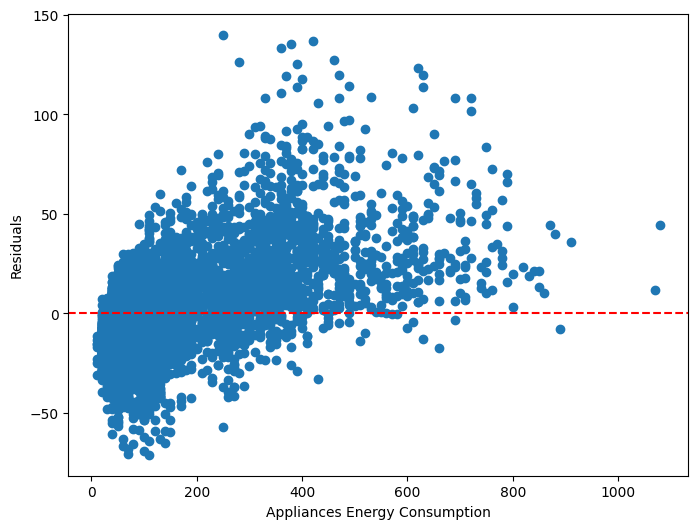

In [ ]:
apply_GBM_model(df)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


GBM Model Training RMSE: 11.878839885752939
GBM Model Testing RMSE: 66.74445450789514

GBM Model Training MAPE: 11.738379098645945%
GBM Model Testing MAPE: 28.774572366541847%

GBM Model Training MAE: 8.259256477361278
GBM Model Testing MAE: 30.69161553358348

GBM Model Training R2: 0.9865940243815806
GBM Model Testing R2: 0.5740159055631683


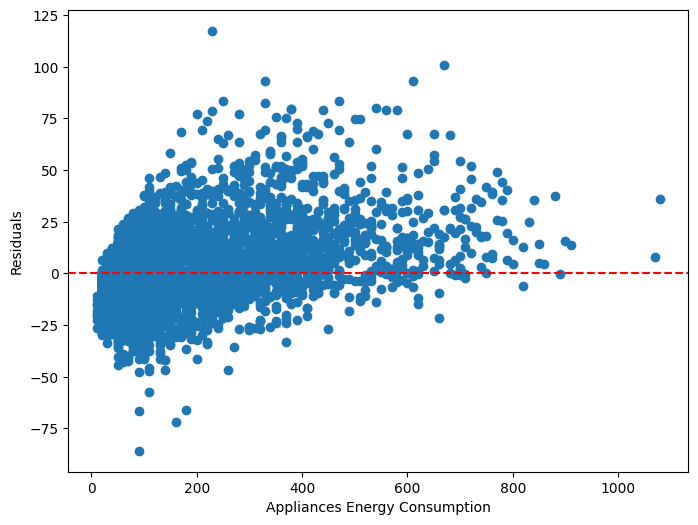

In [ ]:
apply_GBM_model(df_lagged)

# **Apply XGBoost model**

GBM Model Training RMSE: 18.959940168897216
GBM Model Testing RMSE: 63.341496678341066

GBM Model Training MAPE: 15.520314171938601%
GBM Model Testing MAPE: 32.2717640632778%

GBM Model Training MAE: 11.897448712733839
GBM Model Testing MAE: 31.190436973552448

GBM Model Training R2: 0.9662030038052635
GBM Model Testing R2: 0.5990697832427213


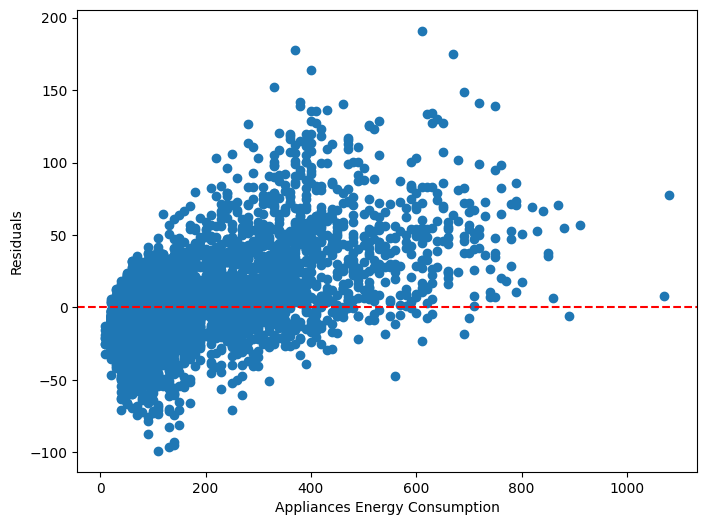

In [ ]:
apply_XGBoost_model(df)

GBM Model Training RMSE: 12.433720627345545
GBM Model Testing RMSE: 65.85797197733761

GBM Model Training MAPE: 11.597314752716251%
GBM Model Testing MAPE: 28.58103220605446%

GBM Model Training MAE: 8.189129256718816
GBM Model Testing MAE: 30.28817934756766

GBM Model Training R2: 0.9853123410992262
GBM Model Testing R2: 0.5852563804703639


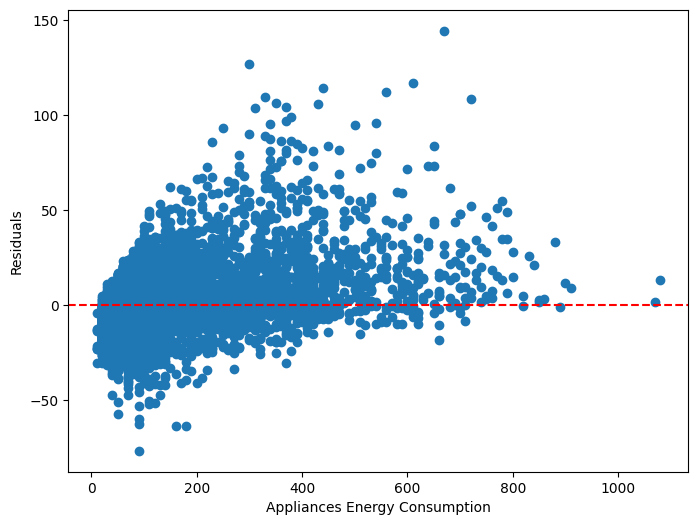

In [ ]:
apply_XGBoost_model(df_lagged)